# Using the force to analyse a Star Wars survey

<img src="star_wars_img.jpg" width=900 />

In this project we're going to explore data from a survey conducted by [FiveThirtyEight on the Star Wars films](https://fivethirtyeight.com/features/americas-favorite-star-wars-movies-and-least-favorite-characters/). The survey was taken in 2014, at which point only six Star Wars films had been released, the original trilogy (Episodes IV, V, and VI) and the prequel trilogy (Episodes I, II, and III).

The survey, which received `835` total responses, sought to ascertain:
- how many people are Star Wars fans
- which film in the series is best/worst
- which characters are most loved/hated
- who shot first?

[Raw survey data available on Github](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

In this project, we're going to clean up the raw data to make it easier to work with, and then try and perform some of our own analysis, including segmenting the survey population around certain demographics.

The anchor links below can be used to navigate to specific sections of the report:

- [Reading and exploring the data](#Reading-and-exploring-the-data)
- [Initial observations](#Initial-observations)
- [Data cleaning](#Data-cleaning)
- [Column reference](#Column-reference)
- [Analysis](#Analysis)
- [Conclusion](#Conclusion)

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import ticker
from rich import print

# draw plots inline
%matplotlib inline

# set global default font sizes for plots
plt.rcParams['axes.labelsize'] = 13
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['xtick.labelsize']= 13
plt.rcParams['ytick.labelsize']= 13

# set top-level seaborn styles
sns.set_style("dark")
sns.set_palette("deep")

# centre-align all plots
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

## Reading and exploring the data
[Back to top](#Using-the-force-to-analyse-a-Star-Wars-survey)

In [2]:
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1") # need to specify encoding as dataset has some 
                                                                # characters not present in default utf-8

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [3]:
star_wars.shape

(1187, 38)

## Initial observations
[Back to top](#Using-the-force-to-analyse-a-Star-Wars-survey)
- the dataset contains `38` columns and `1187` rows
- each row of the dataset appears to be a single response to the survey tied to a unique ID, `RespondentID`
    - the exception to this is the first row, which does not appear to contain actual response data
- several columns contain `Yes`/`No` values, we should try and convert these to `Boolean` values 
- there are a number of columns with the prefix `Unnamed`, these will probably need renaming to something more intuitive
    - the first row looks like it might contain the values that correspond to the `Unnamed` columns, we'll explore this further in the cleanup stage

Since we have `38` columns in our dataset, some of which have very long names, it will be much easier to reference our columns by their index value (as opposed to referencing by column label) using the `DataFrame.iloc()` method. Let's create a function to print out every column label and the correpsonding index.

In [4]:
# function to print each column with its corresponding index number for easy reference
def print_cols():
    for col in star_wars.columns:
        index_no = star_wars.columns.get_loc(col)
        print("{} - {}".format(index_no, col))
        
print_cols()

0 - RespondentID

1 - Have you seen any of the 6 films in the Star Wars franchise?

2 - Do you consider yourself to be a fan of the Star Wars film franchise?

3 - Which of the following Star Wars films have you seen? Please select all that apply.

4 - Unnamed: 4

5 - Unnamed: 5

6 - Unnamed: 6

7 - Unnamed: 7

8 - Unnamed: 8

9 - Please rank the Star Wars films in order of preference with 1 being your favorite film in
the franchise and 6 being your least favorite film.

10 - Unnamed: 10

11 - Unnamed: 11

12 - Unnamed: 12

13 - Unnamed: 13

14 - Unnamed: 14

15 - Please state whether you view the following characters favorably, unfavorably, or are 
unfamiliar with him/her.

16 - Unnamed: 16

17 - Unnamed: 17

18 - Unnamed: 18

19 - Unnamed: 19

20 - Unnamed: 20

21 - Unnamed: 21

22 - Unnamed: 22

23 - Unnamed: 23

24 - Unnamed: 24

25 - Unnamed: 25

26 - Unnamed: 26

27 - Unnamed: 27

28 - Unnamed: 28

29 - Which character shot first?

30 - Are you familiar with the Expanded Universe?

31 - Do you consider yourself to be a fan of the Expanded Universe?æ

32 - Do you consider yourself to be a fan of the Star Trek franchise?

33 - Gender

34 - Age

35 - Household Income

36 - Education

37 - Location (Census Region)

## Data cleaning
[Back to top](#Using-the-force-to-analyse-a-Star-Wars-survey)

### Remove first row from dataset and set aside
The first row of our dataset does not contain actual respondent data, but does contain information that will be useful to us for cleaning up column names. We'll create a copy of the first row so we can refer back to it later, and then delete it from the main dataset.

In [5]:
# store the first row in a separate dataframe
first_row = star_wars.iloc[0].copy().to_frame()

# drop the first row from the dataset and reset index
star_wars = star_wars.drop(0).reset_index(drop=True)

# validate change
star_wars.head(1)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic


### Clean missing characters
One column in our dataset contains characters that could not be interpreted by the `ISO-8859-1` encoding. The missing characters do not appear to be important so we'll remove them now to prevent possible issues later.

In [6]:
# Rename column with missing characters
star_wars = star_wars.rename(columns={
    'Do you consider yourself to be a fan of the Expanded Universe?æ': 
    'Do you consider yourself to be a fan of the Expanded Universe?'
    })

# validate change
print(star_wars.columns[31])

Do you consider yourself to be a fan of the Expanded Universe?

### Clean yes/no answer columns
The following columns represent Yes/No-type questions:
- `Have you seen any of the 6 films in the Star Wars franchise?`
- `Do you consider yourself to be a fan of the Star Wars film franchise?`
- `Are you familiar with the Expanded Universe?`
- `Do you consider yourself to be a fan of the Expanded Universe?`
- `Do you consider yourself to be a fan of the Star Trek franchise?`

They all contain the string values `Yes` and `No` (and `NaN`). We can make the data a bit easier to analyse later by converting each column to a `Boolean` with only the values `True`, `False`, and `NaN`. Booleans are easier to work with because we can select the rows that are `True` or `False` without having to do a string comparison.

In [7]:
# create mapping dictionary
bool_map = {
    "Yes": True,
    "No": False,
}

yes_no_cols = [
    "Have you seen any of the 6 films in the Star Wars franchise?",
    "Do you consider yourself to be a fan of the Star Wars film franchise?",
    "Are you familiar with the Expanded Universe?",
    "Do you consider yourself to be a fan of the Expanded Universe?",
    "Do you consider yourself to be a fan of the Star Trek franchise?"
]

# map new values to columns
for col in yes_no_cols:
    star_wars[col] = star_wars[col].map(bool_map)

# validate change
star_wars[yes_no_cols].head()

,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?
0,True,True,True,False,False
1,False,NaN,NaN,NaN,True
2,True,False,False,NaN,False
3,True,True,False,NaN,True
4,True,True,True,False,False


### Clean question on seen Star Wars films 
These six columns in our `star_wars` dataset represent a single checkbox question in the survey asking which of the six Star Wars films the respondent has seen.

In [8]:
# show next six columns
star_wars.iloc[:5,3:9]

,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN
3,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
4,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi


- `Which of the following Star Wars films have you seen? Please select all that apply.` — whether or not the respondent saw Star Wars: Episode I The Phantom Menace.
- `Unnamed: 4` — whether or not the respondent saw Star Wars: Episode II Attack of the Clones.
- `Unnamed: 5` — whether or not the respondent saw Star Wars: Episode III Revenge of the Sith.
- `Unnamed: 6` — whether or not the respondent saw Star Wars: Episode IV A New Hope.
- `Unnamed: 7` — whether or not the respondent saw Star Wars: Episode V The Empire Strikes Back.
- `Unnamed: 8` — whether or not the respondent saw Star Wars: Episode VI Return of the Jedi.

For each of these columns, it appears that if the value of the cell is the name of the movie, that means the respondent saw the movie. If the value is `NaN`, the respondent either didn't answer or didn't see the movie. For cleaning purposes, **we'll assume** `NaN` **means they didn't see the movie**.

As before, let's convert each of these columns to contain `Boolean` values.

In [9]:
# create mapping dictionary
film_map = {
    np.nan: False,
    "Star Wars: Episode I  The Phantom Menace": True,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True
}

# remap values in columns to bools and rename columns titles to be more intuitive
for count, col in enumerate(star_wars[star_wars.columns[3:9]]):
    star_wars[col] = star_wars[col].map(film_map)
    star_wars.rename(columns={col: "seen_" + str(count + 1)}, inplace=True)

# check output
star_wars.iloc[:5,3:9]

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
0,True,True,True,True,True,True
1,False,False,False,False,False,False
2,True,True,True,False,False,False
3,True,True,True,True,True,True
4,True,True,True,True,True,True


### Clean film ranking columns
The next six columns in the dataset relate to a question asking the respondent to rank the Star Wars films in order from least, `6`, to most favourite `1`. Possible values are therefore: `1`, `2`, `3`, `4`, `5`, `6`, and `NaN`.

In [10]:
star_wars.iloc[:5,9:15]

,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,3,2,1,4,5,6
1,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2,3,4,5,6
3,5,6,1,2,4,3
4,5,4,6,2,1,3


Here's what each column references:

- `Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.` - How much the respondent liked Star Wars: Episode I The Phantom Menace
- `Unnamed: 10` — How much the respondent liked Star Wars: Episode II Attack of the Clones
- `Unnamed: 11` — How much the respondent liked Star Wars: Episode III Revenge of the Sith
- `Unnamed: 12` — How much the respondent liked Star Wars: Episode IV A New Hope
- `Unnamed: 13` — How much the respondent liked Star Wars: Episode V The Empire Strikes Back
- `Unnamed: 14` — How much the respondent liked Star Wars: Episode VI Return of the Jedi

As before, we will need to rename these columns so that they are more intuitive. We will also need to convert each column to a numeric datatype.

In [11]:
# convert column values to float type
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

# rename columns
for count, col in enumerate(star_wars[star_wars.columns[9:15]]):
    star_wars.rename(columns={col: "ranking_" + str(count + 1)}, inplace=True)

# check output
star_wars.iloc[:5,9:15]

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
0,3.0,2.0,1.0,4.0,5.0,6.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,2.0,3.0,4.0,5.0,6.0
3,5.0,6.0,1.0,2.0,4.0,3.0
4,5.0,4.0,6.0,2.0,1.0,3.0


### Clean character favourability columns
Columns 15 through 28 relate to a question asking how the respondents rated various characters in the Star Wars films.

In [12]:
star_wars.iloc[:5,15:29]

,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A)
3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
4,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably


If we slice the `first_row` we created earlier by the same index, we can see which character maps to which column.

In [13]:
first_row[15:29]

,0
"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Han Solo
Unnamed: 16,Luke Skywalker
Unnamed: 17,Princess Leia Organa
Unnamed: 18,Anakin Skywalker
Unnamed: 19,Obi Wan Kenobi
Unnamed: 20,Emperor Palpatine
Unnamed: 21,Darth Vader
Unnamed: 22,Lando Calrissian
Unnamed: 23,Boba Fett
Unnamed: 24,C-3P0


Let's update columns `15:29` in our `star_wars` dataframe with the corresponding character name in `first_row`.

In [14]:
# convert slice of first_row to a dictionary
character_map = first_row[15:29].to_dict()

# this gives us a nested dictionary -  we will need to remove the outer key, '0', 
# for df.rename() to work, while keeping the rest of the dictionary intact
print("[bold]Nested dictionary[/bold] \n")
print(character_map)

# use dictionary comprehension to keep only the inner key-value pairs
character_map = dict(ele for sub in character_map.values() for ele in sub.items())

print("\n[bold]Top level removed[/bold]\n")
print(character_map)

# rename unamed columns with character names using dictionary
star_wars = star_wars.rename(columns=character_map)

print("\n[bold]Updated column names[/bold]\n")
print(star_wars.columns[15:29])

Nested dictionary

{
    0: {
        'Please state whether you view the following characters favorably, unfavorably, or 
are unfamiliar with him/her.': 'Han Solo',
        'Unnamed: 16': 'Luke Skywalker',
        'Unnamed: 17': 'Princess Leia Organa',
        'Unnamed: 18': 'Anakin Skywalker',
        'Unnamed: 19': 'Obi Wan Kenobi',
        'Unnamed: 20': 'Emperor Palpatine',
        'Unnamed: 21': 'Darth Vader',
        'Unnamed: 22': 'Lando Calrissian',
        'Unnamed: 23': 'Boba Fett',
        'Unnamed: 24': 'C-3P0',
        'Unnamed: 25': 'R2 D2',
        'Unnamed: 26': 'Jar Jar Binks',
        'Unnamed: 27': 'Padme Amidala',
        'Unnamed: 28': 'Yoda'
    }
}

Top level removed

{
    'Please state whether you view the following characters favorably, unfavorably, or are 
unfamiliar with him/her.': 'Han Solo',
    'Unnamed: 16': 'Luke Skywalker',
    'Unnamed: 17': 'Princess Leia Organa',
    'Unnamed: 18': 'Anakin Skywalker',
    'Unnamed: 19': 'Obi Wan Kenobi',
    'Unnamed: 20': 'Emperor Palpatine',
    'Unnamed: 21': 'Darth Vader',
    'Unnamed: 22': 'Lando Calrissian',
    'Unnamed: 23': 'Boba Fett',
    'Unnamed: 24': 'C-3P0',
    'Unnamed: 25': 'R2 D2',
    'Unnamed: 26': 'Jar Jar Binks',
    'Unnamed: 27': 'Padme Amidala',
    'Unnamed: 28': 'Yoda'
}

Updated column names

Index(['Han Solo', 'Luke Skywalker', 'Princess Leia Organa',
       'Anakin Skywalker', 'Obi Wan Kenobi', 'Emperor Palpatine',
       'Darth Vader', 'Lando Calrissian', 'Boba Fett', 'C-3P0', 'R2 D2',
       'Jar Jar Binks', 'Padme Amidala', 'Yoda'],
      dtype='object')

Now let's take a look at what unique values appear across the character columns.

In [15]:
# identify all unique values in the character columns
char_vals = (star_wars.iloc[:, 15:29].values  # df.values() converts df to np array 
                                     .ravel() # np.ravel flattens the array
            )                   
unique_vals =  pd.unique(char_vals) # can then supply the np.array to pd.unique()
print(unique_vals)

['Very favorably' 'Unfamiliar (N/A)' nan 'Somewhat favorably'
 'Somewhat unfavorably' 'Very unfavorably'
 'Neither favorably nor unfavorably (neutral)']

Unlike the film rankings, the rating scale for characters is not numerical. If we wanted to do any kind of aggregation beyond counting, we'll need to convert the character rating scale to a numerical one. 

Let's apply a numerical rating to the character columns. We can adopt the same order as the film rankings, where a lower number is better/more favourable and a higher number is worse/less favourable. We'll leave the value `Unfamiliar (N/A)` in place, but we'll trim it's name to just `Unfamiliar`.

In [16]:
# dictionary to remap character favourability to a number
char_dict = {
    'Very favorably': 1,
    'Somewhat favorably': 2,
    'Neither favorably nor unfavorably (neutral)': 3,
    'Somewhat unfavorably': 4,
    'Very unfavorably': 5,
    'Unfamiliar (N/A)': 'Unfamiliar'
}

# update character values
star_wars.iloc[:, 15:29] = star_wars.iloc[:, 15:29].replace(char_dict)

# spot check a column to validate changes
print("Random sample to validate changes")
display(star_wars.iloc[:,15:29].sample(n=5))

Random sample to validate changes

,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda
896,1,1,1,4,1,1,1,1,1,1,1,5,3,1
1002,1,1,1,2,1,Unfamiliar,5,4,Unfamiliar,1,1,Unfamiliar,1,1
91,1,2,2,5,1,Unfamiliar,3,Unfamiliar,3,1,2,5,Unfamiliar,1
176,1,2,2,3,2,2,2,3,3,2,2,5,2,2
623,1,1,1,1,2,2,3,1,3,1,1,2,2,NaN


That should be it for data cleaning. Let's review our updated columns.

## Column reference
[Back to top](#Using-the-force-to-analyse-a-Star-Wars-survey)

In [17]:
print_cols()

0 - RespondentID

1 - Have you seen any of the 6 films in the Star Wars franchise?

2 - Do you consider yourself to be a fan of the Star Wars film franchise?

3 - seen_1

4 - seen_2

5 - seen_3

6 - seen_4

7 - seen_5

8 - seen_6

9 - ranking_1

10 - ranking_2

11 - ranking_3

12 - ranking_4

13 - ranking_5

14 - ranking_6

15 - Han Solo

16 - Luke Skywalker

17 - Princess Leia Organa

18 - Anakin Skywalker

19 - Obi Wan Kenobi

20 - Emperor Palpatine

21 - Darth Vader

22 - Lando Calrissian

23 - Boba Fett

24 - C-3P0

25 - R2 D2

26 - Jar Jar Binks

27 - Padme Amidala

28 - Yoda

29 - Which character shot first?

30 - Are you familiar with the Expanded Universe?

31 - Do you consider yourself to be a fan of the Expanded Universe?

32 - Do you consider yourself to be a fan of the Star Trek franchise?

33 - Gender

34 - Age

35 - Household Income

36 - Education

37 - Location (Census Region)

## Analysis
[Back to top](#Using-the-force-to-analyse-a-Star-Wars-survey)

### Computing the mean rank
Now that we've cleaned up the ranking columns it will be easier to find the highest-ranked film. To do this, we will need to take the mean of each ranking column.

Mean film rank values

=========================

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

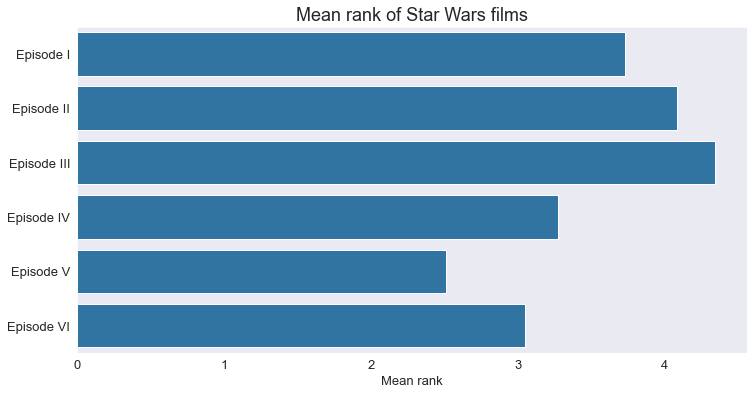

In [18]:
# calculate and print mean of each rank column
mean_ranking = star_wars.iloc[:,9:15].mean()
print("Mean film rank values")
print("="*25)
print(mean_ranking)

# plot bar chart of mean rankings
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.barplot(x=mean_ranking, 
                 y=mean_ranking.index, 
                 color="#1f77b4")
ax.set_xlabel('Mean rank')
ax.set_title("Mean rank of Star Wars films")

# create function to relabel ticks with the epiosde number to make plots more user-friendly
def relabel(axis):
    positions = (0, 1, 2, 3, 4, 5)
    labels = ("Episode I", "Episode II", "Episode III", "Episode IV", "Episode V", "Episode VI")
    for ax in fig.get_axes():
        if axis == "y":
            ax.set_yticks(positions)
            ax.set_yticklabels(labels)
        elif axis == "x":
            ax.set_xticks(positions)
            ax.set_xticklabels(labels)
        else:
            print("Invalid axis, enter either 'x' or 'y'")
            
relabel("y") # relabel y-ticks with episode numbers
    
plt.show()

Recall that the ranking is ordered from `1` - most favourite to `6` - least favourite. Therefore the lower the mean ranking the better. The bar chart reveals that respondents rated films in the original triology higher than films in the prequel trilogy, with **Star Wars: Episode V The Empire Strikes Back** (`ranking_5`) being, on average, the overall favourite film. **Star Wars: Episode III Revenge of the Sith** (`ranking_3`) was the least favourite, which in the author's opinion is quite frankly absurd, but nevermind.

### How many people have seen each film

Earlier we cleaned up the 'seen' columns and converted their values to the Boolean type. Pandas methods that aggregate data treat Booleans like integers, i.e. `True` = `1` and `False` = `0`. This means we can figure out how many people have seen each film just by taking the sum of the column.

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

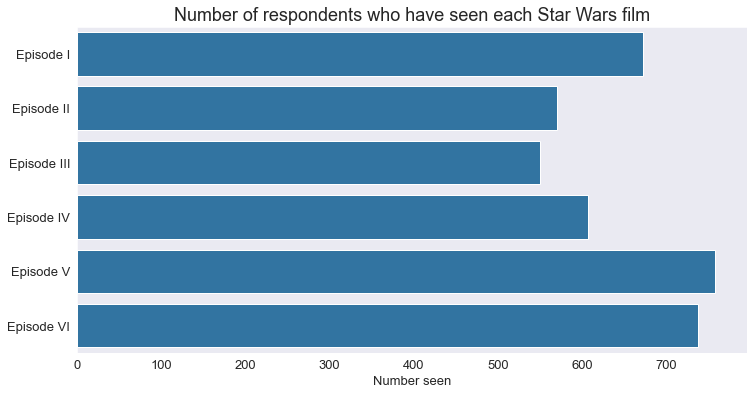

In [19]:
# sum each `seen` column to get count of people who have seen each film
sum_seen = star_wars.iloc[:,3:9].sum()
print(sum_seen)

# plot data on bar chart
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.barplot(x=sum_seen, 
                 y=sum_seen.index, 
                 color="#1f77b4")
ax.set_xlabel('Number seen')
ax.set_title("Number of respondents who have seen each Star Wars film")

relabel("y") # relabel y-ticks with episode numbers

plt.show()

We can see that most survey respondents (`64%`) have seen **Star Wars: Episode V The Empire Strikes Back**, while **Star Wars: Episode III Revenge of the Sith** has been seen by the fewest respondents (`46%`). Could this be related to how people rank each film? Respondents would most likely rank a film they have seen higher than one they haven't. Perhaps it would be better to remove respondents that haven't seen all the films - we'll take a look at this in the next section.

## Segmenting the audience
We now know how the survey population has ranked each film, but we can take a more granular look at the data by examining how certain segments of the survey population responded.

### Respondents who have seen all the films
To see if there is any bias in the answers to film rankings by respondents who have not seen all the films, we'll segment a subset of the population who have seen all the films, and then see if there is any difference in how the films are ranked between this cohort and the general population.

In [20]:
## identify respondents who have seen all the films ##

# use df.all() to create a new column indicating whether a respondent has seen all films
star_wars["seen_all"] = star_wars.iloc[:, 3:9].all(axis='columns')

# confirm output with random sample
star_wars[["seen_1", "seen_2", "seen_3", "seen_4", "seen_5", "seen_6", "seen_all"]].sample(10, random_state=5)

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,seen_all
1153,False,False,False,False,False,False,False
448,True,True,True,True,True,True,True
664,False,False,False,True,False,False,False
1135,False,False,False,False,False,False,False
11,False,False,False,False,False,False,False
149,False,False,False,False,True,False,False
50,True,False,False,True,True,True,False
1138,True,False,True,False,True,True,False
72,True,True,True,True,True,True,True
843,True,True,True,True,True,True,True


Looks like that worked, now let's create our subset and plot the mean rank for each film again. Too make it easier to compare the subset of respondents who have seen all the films with the entire survey population, we'll plot the mean ranking of both groups on the same chart.

39.71 percent of respondents have seen all Star Wars films

Mean film ranks by 'seen_all' cohort and the total survey population

total_pop  seen_all
ranking_1   3.732934  4.237792
ranking_2   4.087321  4.326964
ranking_3   4.341317  4.253191
ranking_4   3.272727  2.866242
ranking_5   2.513158  2.380042
ranking_6   3.047847  2.932059

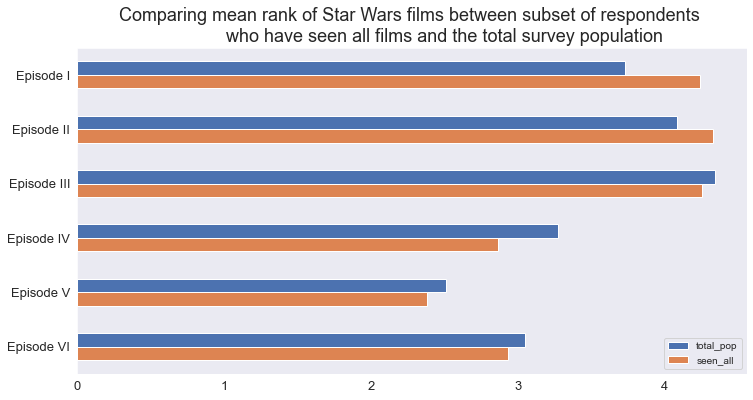

In [21]:
# create subset dataframe of respondents who have seen all the films
seen_all = star_wars[star_wars["seen_all"] == True]

# calc percent of survey pop that has seen Star Wars films
percent_seen_all = seen_all.shape[0] / star_wars.shape[0]
print("{:.2f} percent of respondents have seen all Star Wars films".format(percent_seen_all * 100))

# determine mean film rankings of the 'seen all' cohort
mean_ranking_seen_all = seen_all.iloc[:,9:15].mean()

# combine film rankings for 'seen all' cohort with total survey pop into one dataframe
combined_ranks = pd.concat([mean_ranking, mean_ranking_seen_all], axis=1).rename(
                                                                                 columns={0:"total_pop", 
                                                                                          1:"seen_all"}
                                                                                )

print("[bold]Mean film ranks by 'seen_all' cohort and the total survey population[/bold]")
print(combined_ranks)


# plot bar chart
fig, ax = plt.subplots(figsize=(12,6))
combined_ranks.plot.barh(ax=ax)
ax.invert_yaxis() # invert y-axis to keep consistent with seaborn barplots
ax.set_title("""Comparing mean rank of Star Wars films between subset of respondents 
             who have seen all films and the total survey population""")

relabel("y") # relabel y-ticks with episode numbers

plt.show()

Out of all `1187` respondents, only `471` (`40%`) have seen all the Star Wars films.

The general pattern in film rankings is very similar, however the `seen_all` cohort tends to rank the original triology higher, and the prequel triology lower. Also, the `seen_all` cohort ranks `Episode II` the lowest of all episodes, compared with the total population who rate `Episode III` the lowest. As we suspected earlier, there may well be a bias affect in film rankings caused by respondents who have not seen all the films, specifically for `Episode III` which has been watched by the fewest respondents. However, the affect is probably not signfiicant enough to warrant removing any respondent who has not seen all the films from further analysis.

### Gender and Star Wars
Let's check to see if the survey recieved a fairly similar number of male and female respondents. If the survey is heavily weighted towards one gender, it may affect our analysis.

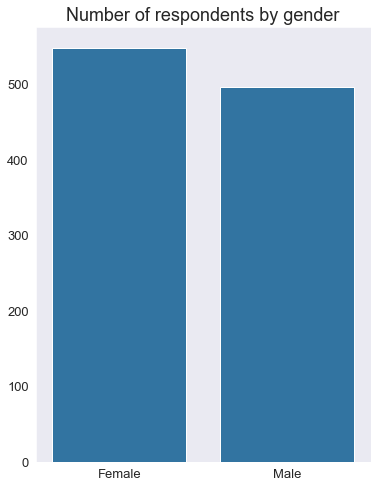

Gender
Female    549
Male      497
Name: RespondentID, dtype: int64

In [22]:
# group dataframe by Gender column
gen = star_wars.groupby(['Gender'])

# plot count of each respondent by gender
fig, ax = plt.subplots(figsize=(6,8))
ax = sns.barplot(x=gen["RespondentID"].count().index,
                 y=gen["RespondentID"].count(),
                 color="#1f77b4")
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_title("Number of respondents by gender")

plt.show()

print(gen["RespondentID"].count())

There are slightly more `Female` respondents than `Male`, but they both roughly account for `50%` of the total survey population. 

Let's take a look at what percentage of males and females identified themselves as a fan of the Star Wars films.

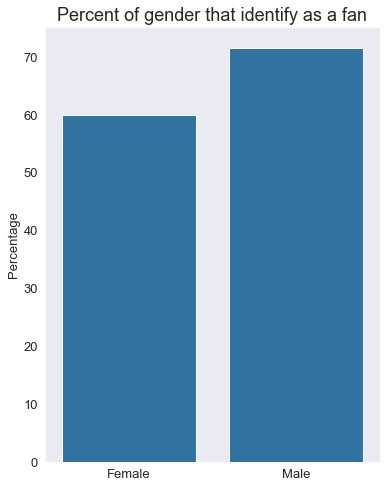

Gender
Female    59.95
Male      71.63
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: float64

In [23]:
## determine if there is a greater % of male star wars fans (of all male respondents) 
## or female fans (of all female respondents)

# select the Star Wars fan col in the gender-grouped dataset
gen_fans = gen["Do you consider yourself to be a fan of the Star Wars film franchise?"]

# calcualte percent of gender that are fans
gen_fans_p = gen_fans.agg(lambda x: round(x.sum() / x.count() * 100, 2))

# plot percent of fans by gender
fig, ax = plt.subplots(figsize=(6,8))
ax = sns.barplot(x=gen_fans_p.index,
                 y=gen_fans_p,
                 color="#1f77b4")
ax.set_ylabel('Percentage')
ax.set_xlabel('')
ax.set_title("Percent of gender that identify as a fan")

plt.show()

print(gen_fans_p)

Approximately `72%` of `Male` respondents identified as a fan of the Star Wars films, compared with `60%` of `Female` respondents. The Star Wars films appear to be more popular with a `Male` audience.

Let's see if there is any difference between male and female respondents in the Star Wars films they have seen and how they ranked them.

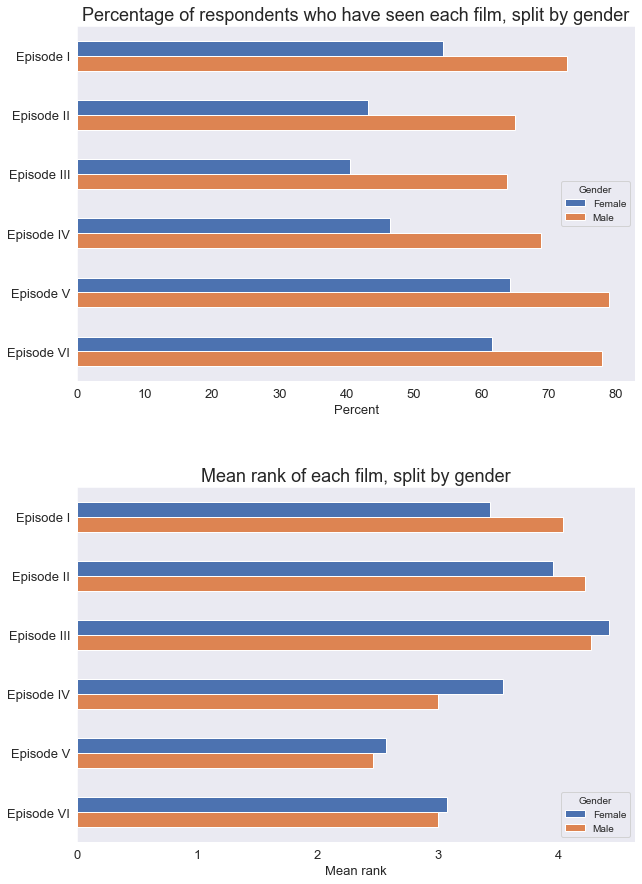

In [24]:
# calculate the percent of each gender that have seen each film
gen_seen = gen[["seen_1", "seen_2", "seen_3", "seen_4", "seen_5", "seen_6"]]
gen_seen_p = gen_seen.agg(lambda x: round(x.sum() / x.count() * 100, 2))
gen_seen_t = gen_seen_p.T # transpose index and columns

# get mean rank of each film by gender
gen_rank = gen[["ranking_1", "ranking_2", "ranking_3", "ranking_4", "ranking_5", "ranking_6"]].mean()
gen_rank_t = gen_rank.T # tranpose index and columns

fig, axs = plt.subplots(nrows = 2, ncols = 1, figsize = (10, 15))

# plot percentage of gender that have watched each film
ax1 = gen_seen_t.plot.barh(title="Percentage of respondents who have seen each film, split by gender", ax = axs[0])
ax1.set_xlabel("Percent")
ax1.invert_yaxis() # invert y-axis to keep consistent with seaborn barplots

# plot rank of films by gender
ax2 = gen_rank_t.plot.barh(title="Mean rank of each film, split by gender", ax = axs[1])
ax2.set_xlabel("Mean rank")
ax2.invert_yaxis() # invert y-axis to keep consistent with seaborn barplots

# relabel y-ticks with episode numbers
relabel("y") 

plt.subplots_adjust(hspace=.3) # increase height space between plots for presentation

plt.show()

The top graph shows us that for all films there is a higher percentage of males that have seen the film compared with the percentage of females. The largest disparity is in `Episode III`, only `40%` of all female respondents have seen the film, compared with `64%` of all male respondents. The general pattern in films seen by both genders reflects what we saw earlier for the total survey population.

Looking at the second graph of mean film rankings by gender, we can see that `Males` seem to view the first couple of films in the prequel trilogy much less favourably than `Females`. For all other films in the series, `Females` tend to have a more negative outlook than `Males`.

### Who shot first?
While there is a question in the survey that directly asks whether a respondent is a fan of the Star Wars series, perhaps a more telling indication of Star Wars fandom is a respondent's answer to the question, **'Which character shot first?'** 

For context, a controversial change was made to a scene in the re-release of **Episode IV**. The scene depicts the character Han Solo in a confrontation with another character, Greedo. In the original version of the scene, Han Solo shoots Greedo dead in cold blood. However, in the re-release of Episode IV, the scene was modified so that Greedo shoots (and misses) Han first before Han retaliates, portraying Han as acting in self-defence rather than being the aggressor. Many fans reacted negatively to this change, arguing that it altered Han Solo's initial moral ambiguity and weakened his story arc, making his later transition from anti-hero to hero less meaningful.

Ultimately, awareness of this change represents somewhat esoteric knowledge of the Star Wars films, which could imply a strong level of fandom.

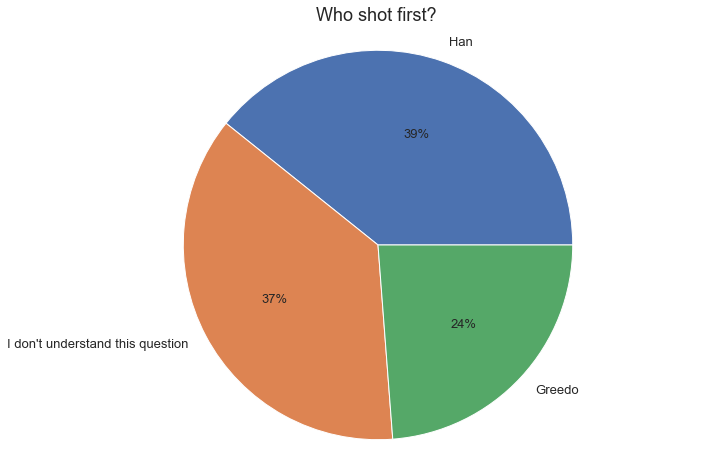

In [25]:
# get percentage of respondents for each answer
wsf_per = star_wars["Which character shot first?"].value_counts(normalize=True)

# plot pie chart of mean rankings
ax = wsf_per.plot.pie(figsize=(12,8), autopct='%1.0f%%', textprops={'fontsize': 13}, colors = sns.color_palette())
ax.set_ylabel("")
ax.set_title("Who shot first?")
ax.axis('equal') # set equal aspect ratio so pie is a true circle

plt.show()

We can see that the majority of respondents think that either `Han` shot first (`39%`) or do not understand the question (`37%`). A smaller number of respondents think `Greedo` shot first (`24%`).

We might expect the respondent's age to be a factor in their answer here. Older respondents are more likely to have seen the original **1977** release of **Episode IV** where Han shoots first, while younger respondents are perhaps more likely to of seen the **1997** re-release where Greedo is the instigator. Let's take a look at this question segmented by the respondent's age.

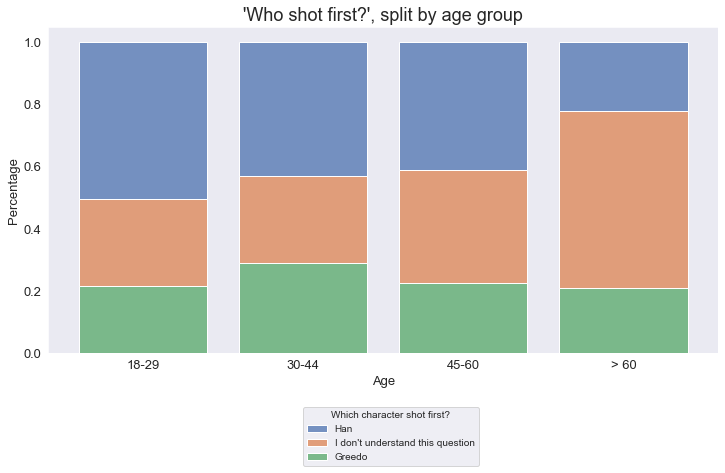

In [26]:
# prepare data for plotting - we'll get the percentage of each answer from each age group
wsf_age = star_wars[["Which character shot first?", "Age"]]
wsf_age_grp = wsf_age.groupby(["Age"])
wsf_age_per = (wsf_age_grp["Which character shot first?"].value_counts(normalize=True)
                                                         .rename("Percent")
                                                         .reset_index()
              )

# plot 100 percent stacked bar chart
fig, ax = plt.subplots(figsize=(12,6))

# seaborn has no native support for stacked bar charts
# but we can repurpose the histogram plot to get a 100 percent stacked barchart
ax = sns.histplot(wsf_age_per, x='Age', 
                  hue="Which character shot first?", 
                  weights='Percent',
                  multiple='stack', 
                  shrink=0.8)
ax.set_ylabel("Percentage")
ax.set_title("'Who shot first?', split by age group")

# relocate legend so it's not overlapping bars
legend = ax.get_legend()
legend.set_bbox_to_anchor((0.65, -0.15))

plt.show()

Turns out, contrary to our expectations, that the majority of respondents in the youngest age group (`18-29`) actually answered `Han` when asked `Which character shot first?`. More so than any other age group. Perhaps the `18-29` age group has the most die-hard Star Wars fans. 

A similar percentage of respondents answered  `Greedo` in each age group, though this percentage was a little higher in the  the `30-44` category. Also of note, people aged over 60 were the least likely to understand what this question meant, even though they would probably have been the target audience at the time of release of `Episode IV`. However, it's important to remember that this detail is so minor it's easy to forget.

### Are fans of Star Wars more likely to be fans of Star Trek too?
People have always drawn comparisons between Star Wars and Star Trek, enough so in fact to warrant a [Wikipedia article](https://en.wikipedia.org/wiki/Comparison_of_Star_Trek_and_Star_Wars). Both sci-fi franchises have strong fan bases, but just how much fan cross-over is there? Let's find out if fans of Star Wars are more or less likely to be fans of Star Trek.

First we'll identify what percentage of our total survey population are fans of Star Trek.

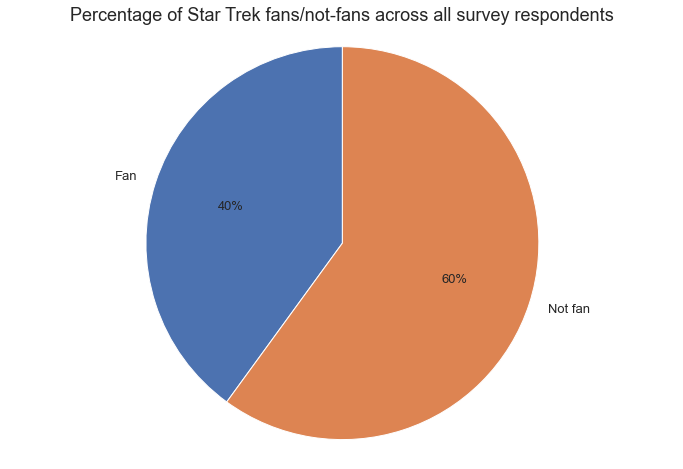

In [27]:
# identify percentage of Star Trek fans in total survey pop
st_fans = (star_wars.iloc[:,32].value_counts(normalize=True)
                               .rename(index={True: 'Fan', False: "Not fan"}) # rename labels for presentation
                               .sort_index() # sort by index label rather than value so colours are kept consistent
                                             # with the next pie chart
          )

# plot pie chart
ax = st_fans.plot.pie(figsize=(12,8), 
                      autopct='%1.0f%%', 
                      textprops={'fontsize': 13}, 
                      startangle=90)
ax.set_ylabel("")
ax.set_title("Percentage of Star Trek fans/not-fans across all survey respondents")
ax.axis('equal') # set equal aspect ratio so pie is a true circle

plt.show()

The majority of survey respondents are **not** fans of Star Trek with a roughly 60:40 split of non-fans to fans. Now let's see how this compares with respondents who **are fans of Star Wars**.

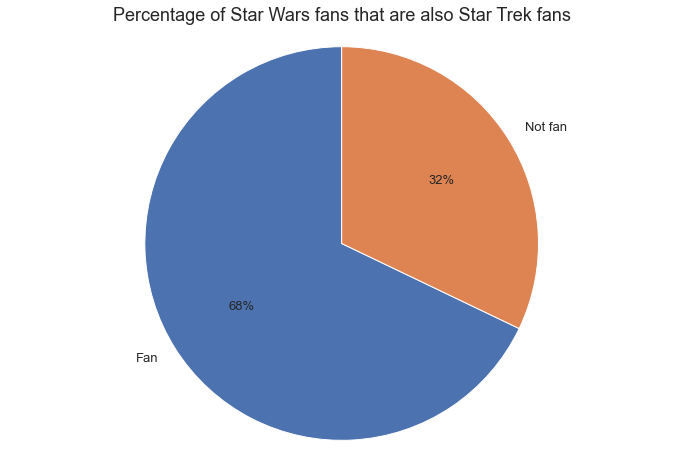

In [28]:
# get subset of Star Wars fans
sw_fans = star_wars[star_wars.iloc[:, 2] == True]

# get percentage of Star Wars fans that are fans/not fans of Star Trek
sw_st_fans = (sw_fans.iloc[:,32].value_counts(normalize=True)
                                .rename(index={True: 'Fan', False: "Not fan"}) # rename labels for presentation
                                .sort_index() # sort by index label rather than value so colours are kept consistent
                                              # with preceding pie chart
             )

# plot pie chart
ax = sw_st_fans.plot.pie(figsize=(12,8), 
                         autopct='%1.0f%%', 
                         textprops={'fontsize': 13},
                         startangle=90,
                         )
ax.set_ylabel("")
ax.set_title("Percentage of Star Wars fans that are also Star Trek fans")
ax.axis('equal') # set equal aspect ratio so pie is a true circle

plt.show()

In a complete flip from the total survey population, we can see that a clear majority of respondents who are Star Wars fans are also fans of Star Trek too.

### Character analysis

The Star Wars films have a number of iconic and memorable characters, but there are also some that may be less familiar to a general audience. Let's see if we can identify the most and least recognisable characters.

In [29]:
# get count of each response in every character column
char_count = star_wars.iloc[:, 15:29].apply(pd.value_counts)

print("[bold]Count of each rating for every character[/bold]")
display(char_count)

# separate counts into two series - familiar and unfamiliar
unfamiliar = char_count.loc["Unfamiliar"].sort_values(ascending=False) # isolate 'Unfamiliar' row from char_count
familiar = (char_count.loc[char_count.index != "Unfamiliar"]
                                                            .sum() # aggregate all other rows in char_count
                                                            .rename("Familiar") # give a name to new series
           )

# combine both series objects into one df
familiarity = pd.concat([unfamiliar, familiar], axis=1)

# calculate percentage of respondents who are unfamiliar
familiarity["% Unfamiliar"] = round((familiarity["Unfamiliar"] / familiarity.sum(axis=1)) * 100, 2)

# show resulting df
print("[bold]Count of each rating for every character[/bold]")
display(familiarity)

Count of each rating for every character

,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda
1,610,552,547,245,591,110,310,142,138,474,562,112,168,605
2,151,219,210,269,159,143,171,223,153,229,185,130,183,144
3,44,38,48,135,43,213,84,236,248,79,57,164,207,51
Unfamiliar,15,6,8,52,17,156,10,148,132,15,10,109,164,10
4,8,13,12,83,8,68,102,63,96,23,10,102,58,8
5,1,3,6,39,7,124,149,8,45,7,6,204,34,8


Count of each rating for every character

,Unfamiliar,Familiar,% Unfamiliar
Padme Amidala,164,650,20.15
Emperor Palpatine,156,658,19.16
Lando Calrissian,148,672,18.05
Boba Fett,132,680,16.26
Jar Jar Binks,109,712,13.28
Anakin Skywalker,52,771,6.32
Obi Wan Kenobi,17,808,2.06
Han Solo,15,814,1.81
C-3P0,15,812,1.81
Darth Vader,10,816,1.21


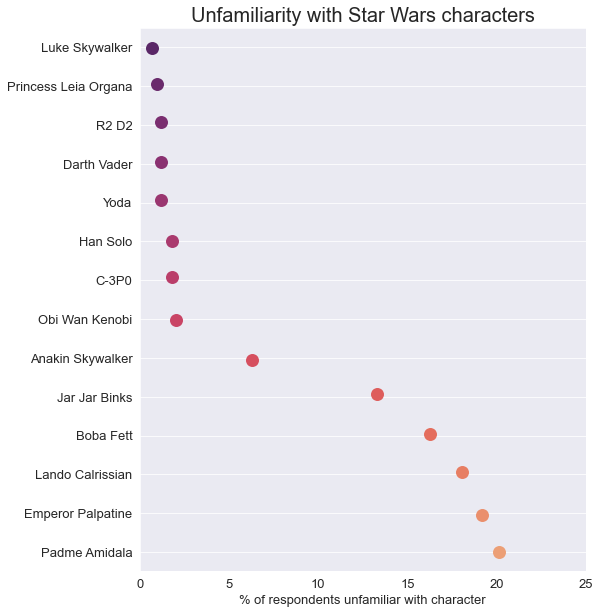

In [30]:
# plot mean ratings
fig, ax = plt.subplots(figsize=(8,10))

sort_fam = familiarity.sort_values("% Unfamiliar", ascending=True)

ax = sns.stripplot(data=sort_fam, 
                   x="% Unfamiliar", y=sort_fam.index,
                   size=13, palette="flare_r")

ax.yaxis.grid(True) # add y-axis grid lines
ax.set(xlim=(0, 25)) # set x-axis to span the entire range of ranks

ax.set_xlabel("% of respondents unfamiliar with character")
ax.set_title("Unfamiliarity with Star Wars characters", fontsize=20)

plt.show()

We can see that among our survey population, `Padme Amidala` was the most unfamiliar character in the Star Wars films with `20%` of respondents not recognising her. A possible reason could be that she only appears in the prequel films (recall from earlier that fewer respondents have seen episodes I-III) but perhaps people may just be less familiar with the name Padme and more familiar with her title as Queen Amidala. Name familiarity may also explain why `Emperor Palpatine` is the second most unfamiliar character, not being recognised by `19%` of respondents, despite playing a prominent role in both trilogies. In the original trilogy, he is known as 'Darth Sidious' or 'The Emperor', his surname 'Palpatine' is not revealed until later films.

Conversely, `Luke Skywalker` was the most familiar character, with less than `1%` of respondents claiming to not be familiar with the character. Not surprising really given he is the main protagonist in the original films.

#### Character rating

Now let's try and identify which character was rated the highest in terms of favourability. To do this, we will need to calculate the the average favourability rating for each character.

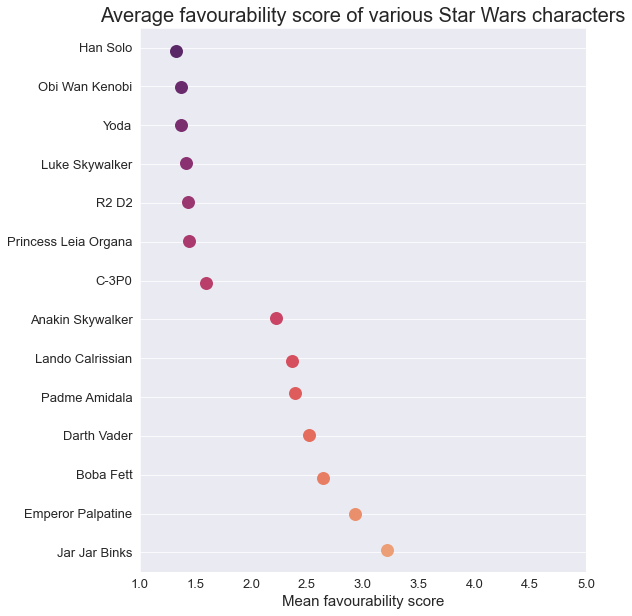

In [31]:
# get mean rating for each character
char_rating = star_wars.iloc[:, 15:29]
char_rating.replace({'Unfamiliar':np.nan}, inplace=True)
char_mean_rating = (char_rating.agg(np.mean).to_frame()
                                            .reset_index()
                                            .rename(columns={"index": "Character", 0: "Rating"})
                   )

# plot mean ratings
fig, ax = plt.subplots(figsize=(8,10))

ax = sns.stripplot(data=char_mean_rating.sort_values("Rating", ascending=True), 
                   x="Rating", y="Character",
                   size=13, palette="flare_r")

ax.yaxis.grid(True) # add y-axis grid lines
ax.set(xlim=(1, 5)) # set x-axis to span the entire range of ranks

ax.set_xlabel("Mean favourability score", fontsize=15)
ax.set_ylabel("")
ax.set_title("Average favourability score of various Star Wars characters", fontsize=20)

plt.show()

Our dot plot reveals that, on average, `Han Solo` is most favourable character in the Star Wars films, followed closely by Jedi masters `Obi Wan Kenobi` and `Yoda`.

Unsurprisingly, the [controversial character `Jar Jar Binks`](https://en.wikipedia.org/wiki/Jar_Jar_Binks#Reception) has the lowest average favourabiity score.

It's interesting that all of the characters in the top half of the favourability scores are generally portrayed as 'good', whereas `57%` of the characters in the bottom half are 'villains'. Perhaps people have a bias towards morally good characters.

#### Character rating by demographic

Lets have a deeper look into `Han Solo` and `Jar Jar Binks` and see if there is any variation in favourability ratings by age group. While we would expect `Han Solo` to be favoured by all, perhaps the older generations will be even more fond of the character since they were around at the time of release for the original triology. Additionally, we could expect `Jar Jar Binks` to be favoured more by the younger respondents, who would of been children at the time of release of the prequel trilogy and would perhaps be more receptive to the character's goofy antics than the older generations.

To make the data easier to digest, we'll convert the **five** numerical character favourability ratings into **three** text categories, `Positive`, `Neutral`, and `Negative`.

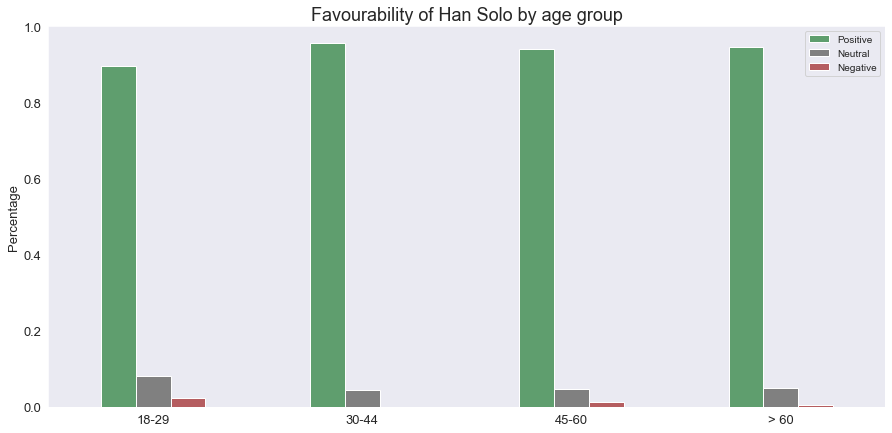

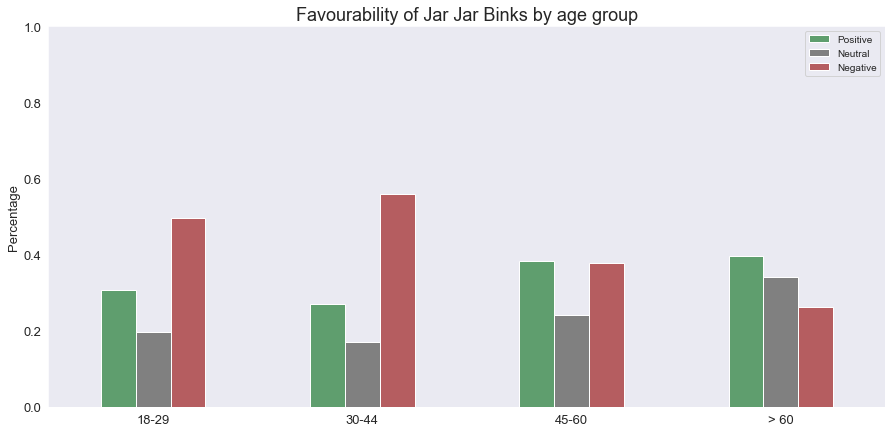

In [32]:
# create subset of character favourability ratings along with age and gender columns
fav_char = star_wars[["Han Solo", "Jar Jar Binks", "Age", "Gender"]].copy()

# convert 5-point numerical rating into 3-point rating with text categories
replace_vals = fav_char[["Han Solo", "Jar Jar Binks"]].replace(
                                                              {'Unfamiliar':np.nan, 
                                                              1.0:"Positive", 
                                                              2.0:"Positive", 
                                                              3.0:"Neutral", 
                                                              4.0:"Negative", 
                                                              5.0:"Negative"}
                                                              )

# since our rating system is now string-based, we'll make use of Panda's categorical dtype
# so that we can create a logical order for our values and improve the presentation of the plots
from pandas.api.types import CategoricalDtype
cat_type = CategoricalDtype(categories=["Positive", "Neutral", "Negative"], ordered=True)
apply_cats = replace_vals.astype(cat_type)

# update rating columns with new categorical dtypes
fav_char[["Han Solo", "Jar Jar Binks"]] = apply_cats

# group the character ratings by age
age_fav_char = fav_char.groupby(["Age"])

# get percentage of each rating for each character, it's necessary to use unstack() here to
# pivot the rating values into columns so our bar plots look nice
han_fav = age_fav_char["Han Solo"].value_counts(normalize=True).unstack()
jar_fav = age_fav_char["Jar Jar Binks"].value_counts(normalize=True).unstack()

# function to setup bar plot with desired styling
def plot_fav_bar(df, title):
    ax = df.plot.bar(figsize=(15,7), 
                     color={"Positive": "#5f9e6e", "Neutral": "Grey", "Negative": "#b55d60"},
                     rot=0,
                     ylim=(0,1),
                     title=title,
                     ylabel="Percentage",
                     xlabel="")
    plt.show()
    
# create bar plots
plot_fav_bar(han_fav, "Favourability of Han Solo by age group")    
plot_fav_bar(jar_fav, "Favourability of Jar Jar Binks by age group")

The plots show us that `Han Solo` is universally favoured across all age groups, with very few individuals viewing the character in a neutral or negative light. `Jar Jar Binks` is much more polarised, it is clear that, and counter to our expectations, the younger generations are much more hostile towards the character, while the older generations are more tolerant. In fact, the **majority** of respondents aged `>60` *actually* view `Jar Jar Binks` positively!

It's probably safe to assume that `Han Solo` is universally loved by all, no matter the demographic. However, `Jar Jar Binks` is clearly polarising among respondents, so let's see if there's any difference in favourability by `Gender` for the character.

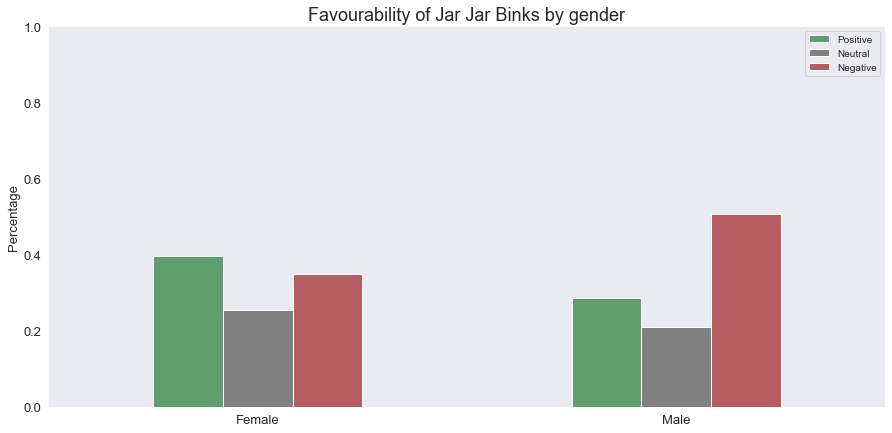

In [33]:
# group the character ratings by age
fav_gen = fav_char.groupby(["Gender"])

# get percentage of each rating for each character, it's necessary to use unstack() here to
# pivot the rating values into columns so our bar plots look nice
jar_fav = fav_gen["Jar Jar Binks"].value_counts(normalize=True).unstack()

# create bar plots
plot_fav_bar(jar_fav, "Favourability of Jar Jar Binks by gender")

Male respondents maintain the general dislike of `Jar Jar Binks`, however, the majority of female respondents (`40%`) actually enjoy the character, compared with `35%` who didn't like the character, and `25%` who felt neutral.

### Which US subregion has the highest ratio of Star Wars fans to non-fans?
The survey data includes the location of each respondent in the United States by subregion. Let's take a look at each subregion and identify how many respondents are from each area.

In [34]:
# get respondent count of each subregion
star_wars.iloc[:, 37].value_counts()

East North Central    181
Pacific               175
South Atlantic        170
Middle Atlantic       122
West South Central    110
West North Central     93
Mountain               79
New England            75
East South Central     38
Name: Location (Census Region), dtype: int64

Most respondents are from states in the `East North Central` subregion, interestingly, `East South Central` had the fewest number of respondents, though this is likely related to general population figures.

#### Plotting a geographic map with geopandas
We can use the `geopandas` library to read in a shapefile of the United States. The shapefile contains geometric boundary data for each state which can be used to plot a map of the USA.

In [35]:
# import necessary libraries
import geopandas as gpd
from shapely.geometry import Point, Polygon

# read in shapefile of USA to geopandas
usa = gpd.read_file('./maps/states_21basic/states.shp')

usa.head()

,drawseq,state_abbr,state_fips,state_name,sub_region,geometry
0,NaN,HI,15,Hawaii,Pacific,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497..."
1,NaN,WA,53,Washington,Pacific,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
2,NaN,MT,30,Montana,Mountain,"POLYGON ((-111.47543 44.70216, -111.48080 44.6..."
3,NaN,ME,23,Maine,New England,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ..."
4,NaN,ND,38,North Dakota,West North Central,"POLYGON ((-98.73044 45.93827, -99.00683 45.939..."


We can see our `usa` geodataframe contains the boundary data for each state, stored as a polygon in the `geometry` column. Importantly, each state is assigned to a `sub_region`, let's familarise ourselves with the subregions of the USA.

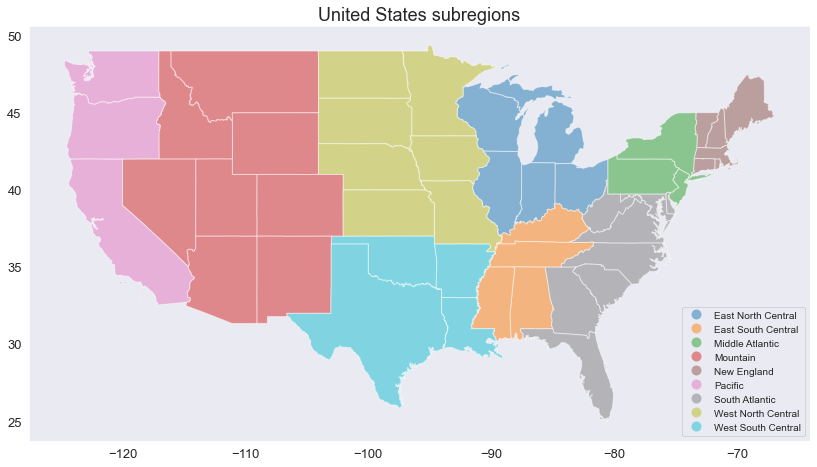

In [36]:
## plot map of US subregions ##

# exclude Alaska and Hawaii as they are too far away and make the mainland appear small (sorry!)
main_states = usa[(usa["state_abbr"] != "HI") & (usa["state_abbr"] != "AK")]

fig, ax = plt.subplots(figsize=(14,14))

main_states.plot(ax=ax,
                 alpha=.5, # mute colours with transparency so they're less intense
                 column="sub_region", 
                 edgecolor="white", 
                 linewidth=1, 
                 legend=True,
                 legend_kwds={'loc': 'lower right'})

plt.title("United States subregions")

plt.show()

**Note**: Alaska and Hawaii are part of the `Pacific` subregion but have been removed from this map to make it easier to view the mainland.

Now that we have a good idea of where each subregion is, let's identify what percentage of respondents from each subregion identify as 'fans' of Star Wars. First, we need to combine our Star Wars survey data with our geodataframe, `main_states`.

#### Merge Star Wars survey data with shapefile data

In [37]:
# get columns pertaining to fan status and location from survey dataset
fan_loc = star_wars.iloc[:, [2,37]].copy()

# rename columns for easier manipulation
fan_loc = fan_loc.rename(columns={"Do you consider yourself to be a fan of the Star Wars film franchise?": "fan",
                                    "Location (Census Region)": "sub_region"})

# group fans by sub_region and aggregate by percentage of fans to non-fans in each region
fan_loc_per = fan_loc.groupby("sub_region")["fan"].value_counts(normalize=True).unstack().reset_index()

# remove redundant index name
fan_loc_per = fan_loc_per.rename_axis(None, axis=1)

# rename columns
fan_loc_per = fan_loc_per.rename(columns={False: "non_fan", True: "fan"})

# merge star wars fan data with geodataframe taken from the shapefile using 'sub_region' as the key
geo_fans = pd.merge(fan_loc_per, main_states, on="sub_region", indicator=True)

# note - given that we do not have the granularity down to the state-level in our Star Wars dataset, we would ideally
# use a shapefile containing geometry for the sub-regions themselves, rather than individiaul states
# however this has been hard to source
print("First 15 rows")
geo_fans.head(15)

First 15 rows

,sub_region,non_fan,fan,drawseq,state_abbr,state_fips,state_name,geometry,_merge
0,East North Central,0.373134,0.626866,NaN,WI,55,Wisconsin,"MULTIPOLYGON (((-87.74856 44.96162, -87.83999 ...",both
1,East North Central,0.373134,0.626866,22.0,IN,18,Indiana,"POLYGON ((-86.34161 38.17729, -86.36435 38.193...",both
2,East North Central,0.373134,0.626866,26.0,OH,39,Ohio,"POLYGON ((-83.27276 38.60926, -83.29004 38.596...",both
3,East North Central,0.373134,0.626866,27.0,IL,17,Illinois,"POLYGON ((-88.07159 37.51104, -88.08791 37.476...",both
4,East North Central,0.373134,0.626866,50.0,MI,26,Michigan,"MULTIPOLYGON (((-88.49753 48.17380, -88.62533 ...",both
5,East South Central,0.375000,0.625000,33.0,KY,21,Kentucky,"MULTIPOLYGON (((-86.51067 36.65507, -86.77054 ...",both
6,East South Central,0.375000,0.625000,40.0,TN,47,Tennessee,"POLYGON ((-83.95461 35.45554, -84.01256 35.407...",both
7,East South Central,0.375000,0.625000,43.0,AL,01,Alabama,"POLYGON ((-85.07007 31.98070, -85.11515 31.907...",both
8,East South Central,0.375000,0.625000,44.0,MS,28,Mississippi,"POLYGON ((-88.45080 31.43562, -88.43456 31.120...",both
9,Middle Atlantic,0.311828,0.688172,18.0,PA,42,Pennsylvania,"POLYGON ((-77.47579 39.71962, -78.09595 39.725...",both


#### Plot choropleth map of fan percentage

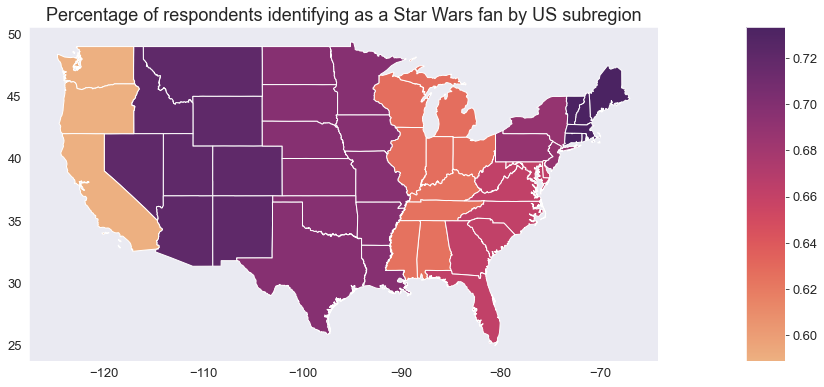

In [38]:
# need to set the 'active geometry' on our pandas dataframe to get a geopandas geodataframe
geo_fans = geo_fans.set_geometry("geometry")

fig, ax = plt.subplots(figsize=(15,15))

# split ax so we can plot the legend on the new axes
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax) # divide the axes labelled 'ax'
cax = divider.append_axes("right", size="5%", pad=0.1) # append a new axes at same height as oriignal axes

# plot cholorepleth map of USA by subregions 
geo_fans.plot(column="fan", 
              ax=ax,
              legend=True, 
              cmap="flare", 
              cax=cax, # cax param is the axes on which to draw the legend when using a color map
              #legend_kwds={"title":"yo"}
             )

ax.set_title("Percentage of respondents identifying as a Star Wars fan by US subregion")

plt.show()

We can see that the `Mountain` and `New England` subregions have among the strongest ratios of fans to non- Star Wars fans. Over `70%` of the respondents in these two subregions identified as a fan of Star Wars. Conversely, the `Pacific` subregion has the lowest percentage of respondents who considered themselves a fan.

## Conclusion
[Back to top](#Using-the-force-to-analyse-a-Star-Wars-survey)

### General
- `1187` total responses to the survey
- On average, `Episode V` is ranked the highest, while `Episode III` is ranked the lowest
- `Episode V` has been watched by the greatest number of respondents (`758` out of `1187`)
- `Episode III` has been watched by the fewest number of respondents (`550` out of `1187`)

### Seen all films segment
- Only `40%` of respondents have seen all the Star Wars films (`471` out of `1187`)
- The `seen_all` cohort film rankings generally reflects that of the total survey population, with a couple of differences:
    - film rankings by the `seen_all` cohort are more extreme than of `total_pop` - the original trilogy is viewed even more favourably, and the prequel trilogy is considered even less appealing
    - the `seen_all` cohort actually ranks `Episode II` the lowest of all films

### Gender
- There is roughly a 50:50 split between `Male` and `Female` respondents, with slightly more females
- Males are more likely to identify as a fan of Star Wars than females (`72%` of `Male` respondents are a fan of Star Wars, compared with `60%` of `Female` respondents)
- `Male` respondents typically have seen more Star Wars films than `Female` respondents
- `Male` respondents judge the first two films of the Star Wars prequel trilogy more harshly compared with females, while `Female` respondents view all the other films in the series more negatively than males.

### Which character shot first?
- By a slight majority, most respondents believe that Han shot first, though a near equal number of respondents did not understand the question at all, while a clear minority of respondents answered `Greedo`
- While we expected a greater proportion of respondents in the youngest age group (`18-29`) to answer `Greedo` when compared with other age groups, this was not the case. In fact, `30-44` year olds had the greatest representation of `Greedo` voters.

### Star Wars vs Star Trek
- The majority of survey respondents did not consider themselves to be a fan of Star Trek
- People who identify as a fan of Star Wars are much more likely to be a fan of Star Trek than the general population

### Characters
- Unsurprisingly, `Luke Skywalker` is the most familiar character in the Star Wars series
- Respondents were least familiar with `Padme Amidala`, with up to `20%` of respondents unsure of who the character was
- `Han Solo` was viewed most favourably of all characters and is well appreciated across all age groups
- `Jar Jar Binks` was the least favourable character in the Star Wars universe, however, he is actually viewed positively by the majority of respondents aged 60 years and over, and also by the majority of female respondents. It's not clear why this might be the case
-  The top half of characters in terms of favourability rating are generally portrayed as 'good', whereas the majority of  characters in the bottom half by favourability rating are 'villains'. Perhaps people have a favourability bias towards morally good characters.

### Fans by location
- The `Mountain` and `New England` subregions of the USA have the highest percentage of respondents identifying as fans (approximately `72%`)
- The `Pacific` subregion has the lowest percentage (approximately `60%`). This is still fairly high, so it's worth considering the bias that a Star Wars survey is much more likely to be taken by fans of the series than non-fans.